In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\mlawal\\Downloads\\archive\\FuelConsumption (1).csv"
data = pd.read_csv(file_path)

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
count   639.0   639.000000  639.000000        639.000000    639.000000
mean   2000.0     3.265728    5.805947         14.713615    296.809077
std       0.0     1.231012    1.625588          3.307044     65.504178
min    2000.0     1.000000    3.000000          4.900000    104.000000
25%    2000.0     2.200000    4.000000         12.500000    253.000000
50%    2000.0     3.000000    6.000000         14.400000    288.000000
75%    2000.0     4.300000    6.000000         16.600000    343.000000
max    2000.0     8.000000   12.000000         30.200000    582.000000


Correlation Matrix:
                  Year  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
Year               NaN          NaN        NaN               NaN           NaN
ENGINE SIZE        NaN     1.000000   0.893819          0.858170      0.849714
CYLINDERS          NaN     0.893819   1.000000          0.825784      0.798447
FUEL CONSUMPTION   NaN     0.858170   0.825784          1.000000      0.983232
COEMISSIONS        NaN     0.849714   0.798447          0.983232      1.000000


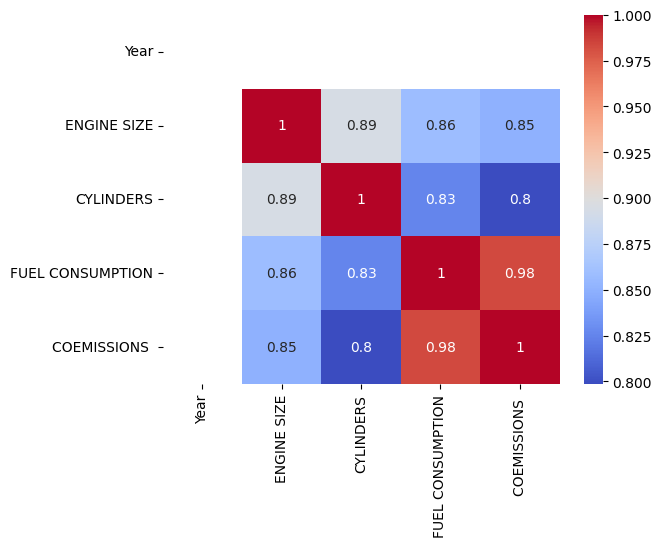

In [6]:
# 2. Correlation Analysis
# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])  # This ensures only numeric columns are included
print("Correlation Matrix:")
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Plotting the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


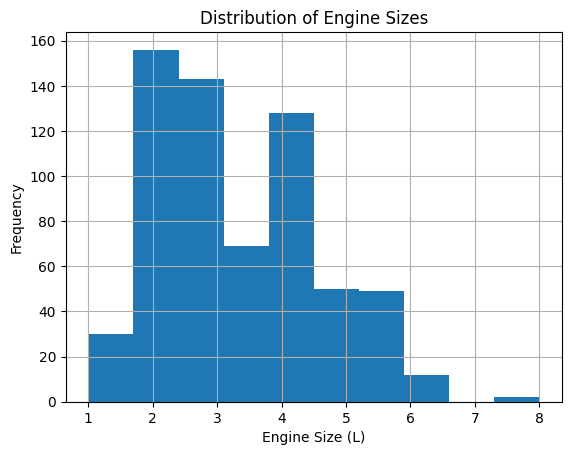

In [7]:
# 4. Histograms
data['ENGINE SIZE'].hist()
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')
plt.show()

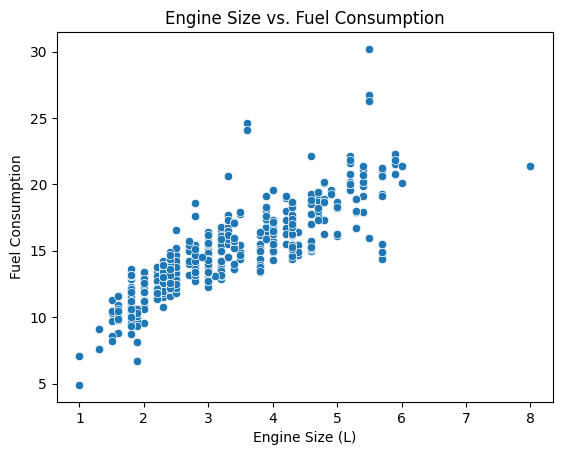

In [8]:
# 5. Scatter Plots
sns.scatterplot(x='ENGINE SIZE', y='FUEL CONSUMPTION', data=data)
plt.title('Engine Size vs. Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption')
plt.show()

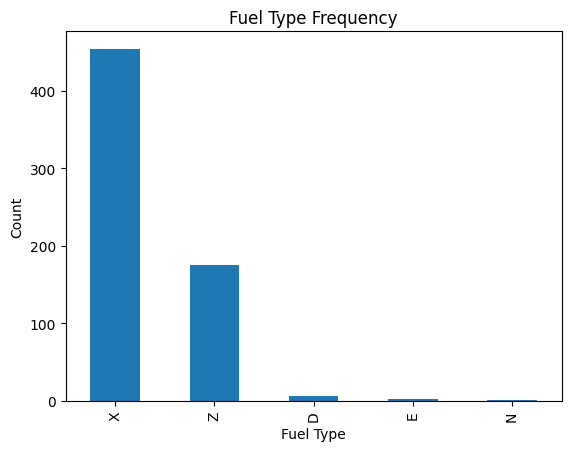

In [9]:
# 6. Bar Charts
data['FUEL'].value_counts().plot(kind='bar')
plt.title('Fuel Type Frequency')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [21]:
# Assuming 'COEMISSIONS' is the correct column name after being verified
# Calculate average emissions and fuel consumption for each make
average_emissions = data.groupby('MAKE')['COEMISSIONS'].mean()
average_fuel_consumption = data.groupby('MAKE')['FUEL CONSUMPTION'].mean()

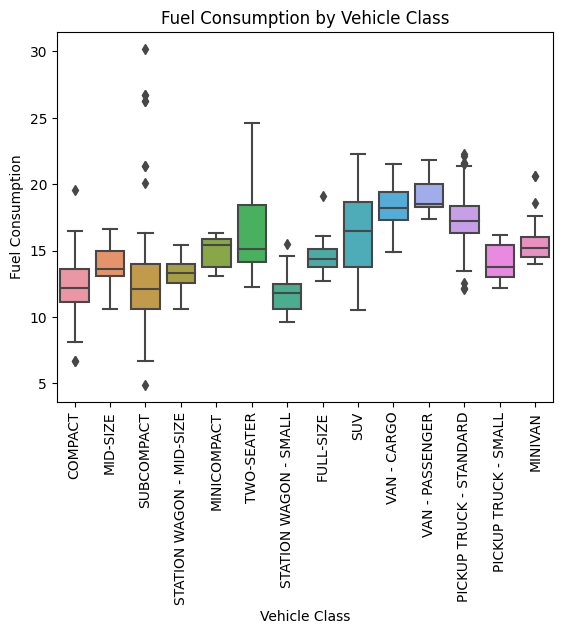

In [22]:
sns.boxplot(x='VEHICLE CLASS', y='FUEL CONSUMPTION', data=data)
plt.xticks(rotation=90)
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption')
plt.show()

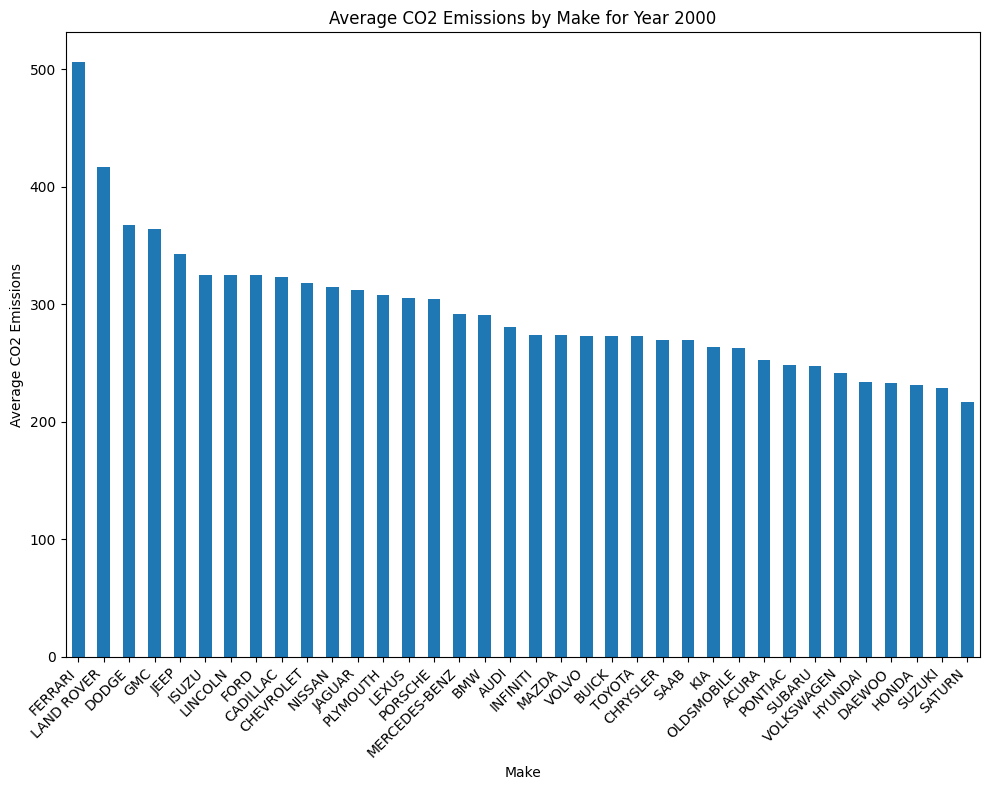

In [23]:
# Plot average emissions by make
plt.figure(figsize=(10, 8))
average_emissions.sort_values(ascending=False).plot(kind='bar')
plt.title('Average CO2 Emissions by Make for Year 2000')
plt.ylabel('Average CO2 Emissions')
plt.xlabel('Make')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

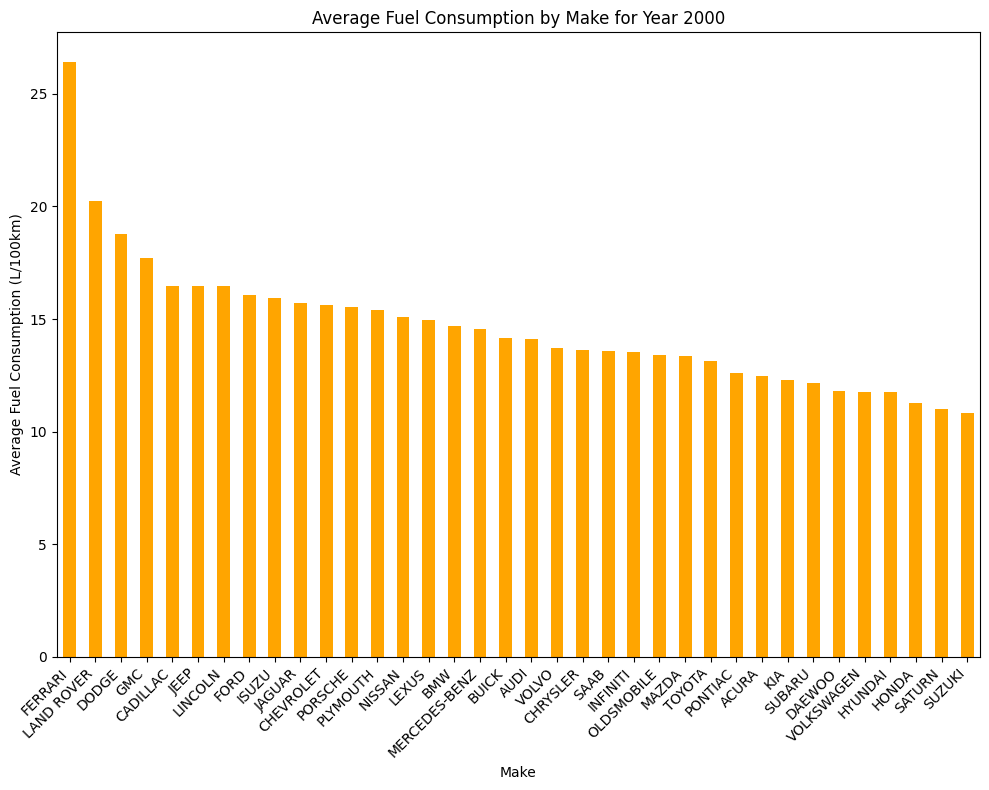

In [24]:
# Plot average fuel consumption by make
plt.figure(figsize=(10, 8))
average_fuel_consumption.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Fuel Consumption by Make for Year 2000')
plt.ylabel('Average Fuel Consumption (L/100km)')
plt.xlabel('Make')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

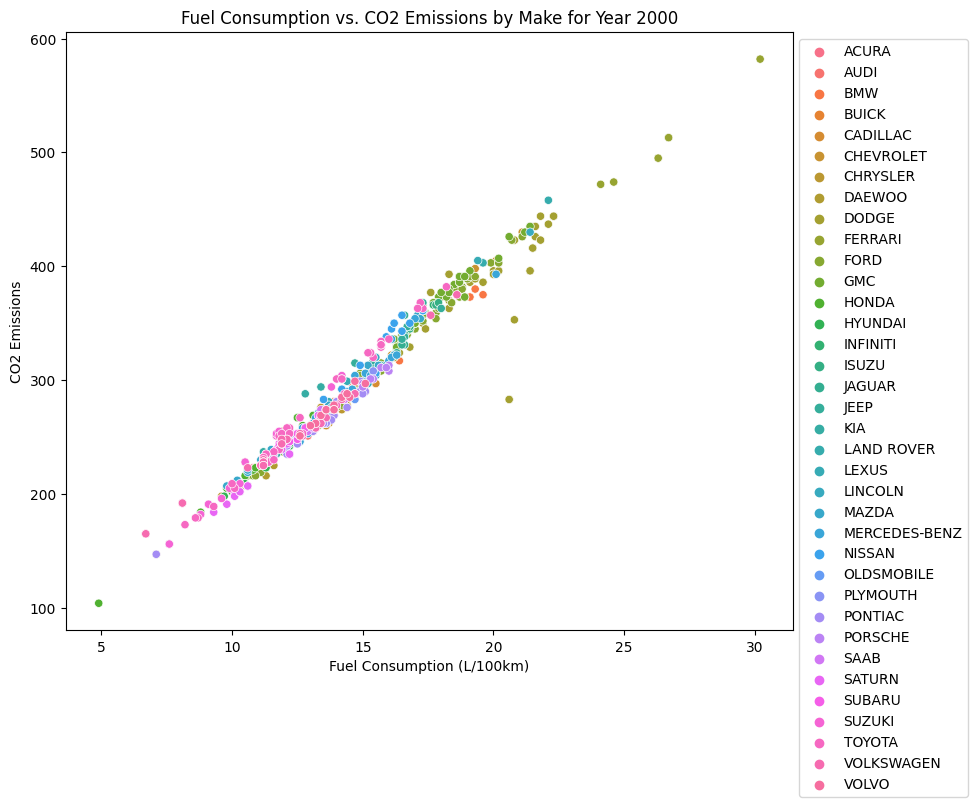

In [25]:
# Optional: Use a scatter plot to compare emissions and fuel consumption
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='FUEL CONSUMPTION', y='COEMISSIONS', hue='MAKE')
plt.title('Fuel Consumption vs. CO2 Emissions by Make for Year 2000')
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('CO2 Emissions')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

In [14]:
# First, print the column names to check for any extra spaces or typos
print(data.columns)

# Assuming the correct column name might have extra spaces, you would trim or correct the name like this:
data.columns = data.columns.str.strip()  # This will remove leading and trailing spaces from column names

# Now, update the script with the possibly corrected column name:
features = data[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']]
target = data['COEMISSIONS']  # Use the trimmed column name without extra spaces

# Proceed with the rest of the script for model training and prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Displaying model coefficients
print("Model Coefficients:")
print(pd.DataFrame(model.coef_, features.columns, columns=['Coefficient']))


Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')
Mean Squared Error: 80.43725237508106
Model Coefficients:
                  Coefficient
ENGINE SIZE          4.389027
CYLINDERS           -3.154732
FUEL CONSUMPTION    19.373691


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data
file_path = "C:\\Users\\mlawal\\Downloads\\archive\\FuelConsumption (1).csv"
data = pd.read_csv(file_path)

# Correcting potential issues with column names
data.columns = data.columns.str.strip()  # This will remove leading and trailing spaces from column names

# Print all column names to check for any extra spaces or typos
print(data.columns)  # Confirm the column names, especially the one for emissions

# Preparing features and target
features = data[['MAKE', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']]
target = data['COEMISSIONS']  # Replace 'COEMISSIONS' with the actual column name from the print statement if necessary

# Create a column transformer with OneHotEncoder for the categorical 'MAKE' column
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(), ['MAKE'])
], remainder='passthrough')

# Create a pipeline with transformation and a regression model
pipeline = Pipeline([
    ('transform', column_transformer),
    ('regressor', LinearRegression())
])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Aggregate predictions by 'MAKE' to find the highest average emissions
test_with_pred = X_test.copy()
test_with_pred['Predicted Emissions'] = predictions
avg_emissions_by_make = test_with_pred.groupby('MAKE')['Predicted Emissions'].mean()

# Display the average predicted emissions by car make
print("Average predicted emissions by car make:")
print(avg_emissions_by_make.sort_values(ascending=False))

# Optionally, find the make with the highest average predicted emissions
highest_emissions_make = avg_emissions_by_make.idxmax()
print(f"Car make with the highest predicted average emissions: {highest_emissions_make}")


Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS'],
      dtype='object')
Mean Squared Error: 51.48401441012664
Average predicted emissions by car make:
MAKE
FERRARI          515.955129
DODGE            369.141183
GMC              368.724705
ISUZU            360.743184
CADILLAC         360.031099
JEEP             341.411974
FORD             336.151135
CHEVROLET        329.943879
MERCEDES-BENZ    311.878702
JAGUAR           307.225432
PORSCHE          303.374034
NISSAN           299.431285
TOYOTA           289.825162
BMW              283.460989
LEXUS            280.231314
BUICK            276.666877
VOLVO            275.992792
PONTIAC          268.542414
SAAB             263.777393
AUDI             259.721805
MAZDA            257.733944
ACURA            249.174343
SUBARU           244.963398
CHRYSLER         241.007161
HONDA            237.375331
VOLKSWAGEN       236.355853
DAEWOO           228.0

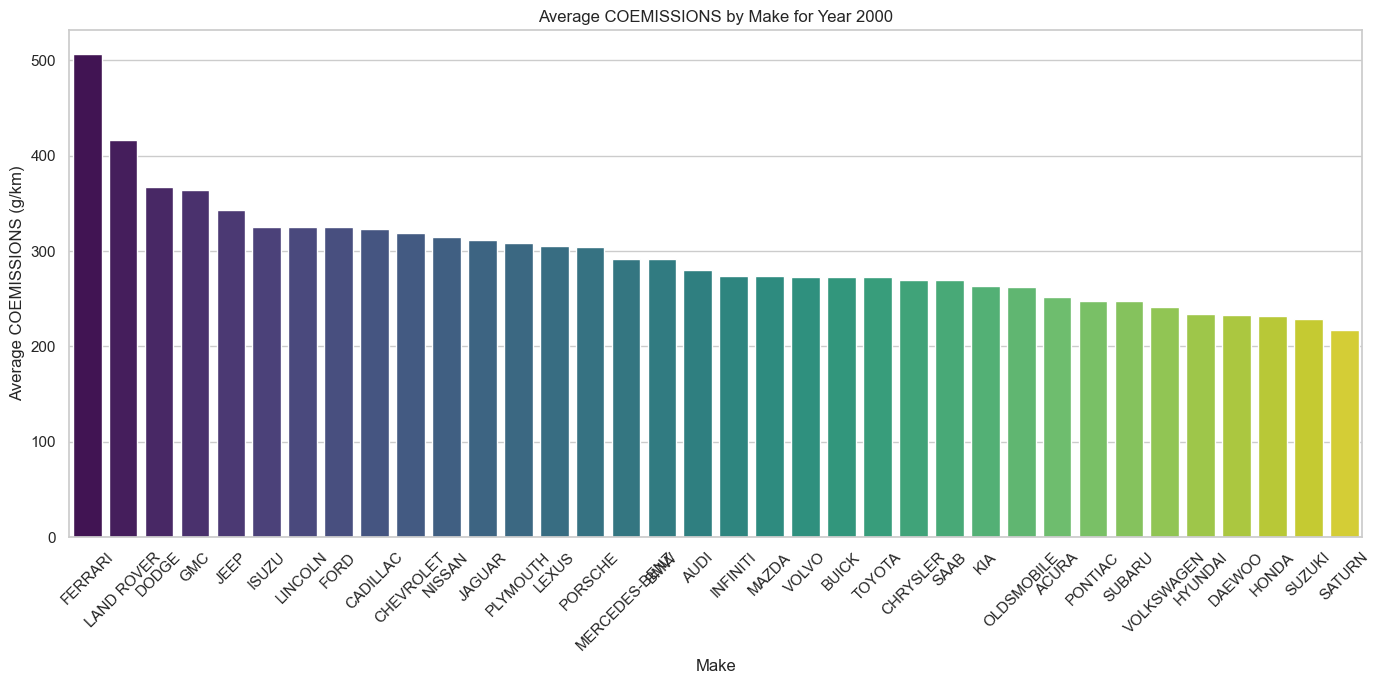

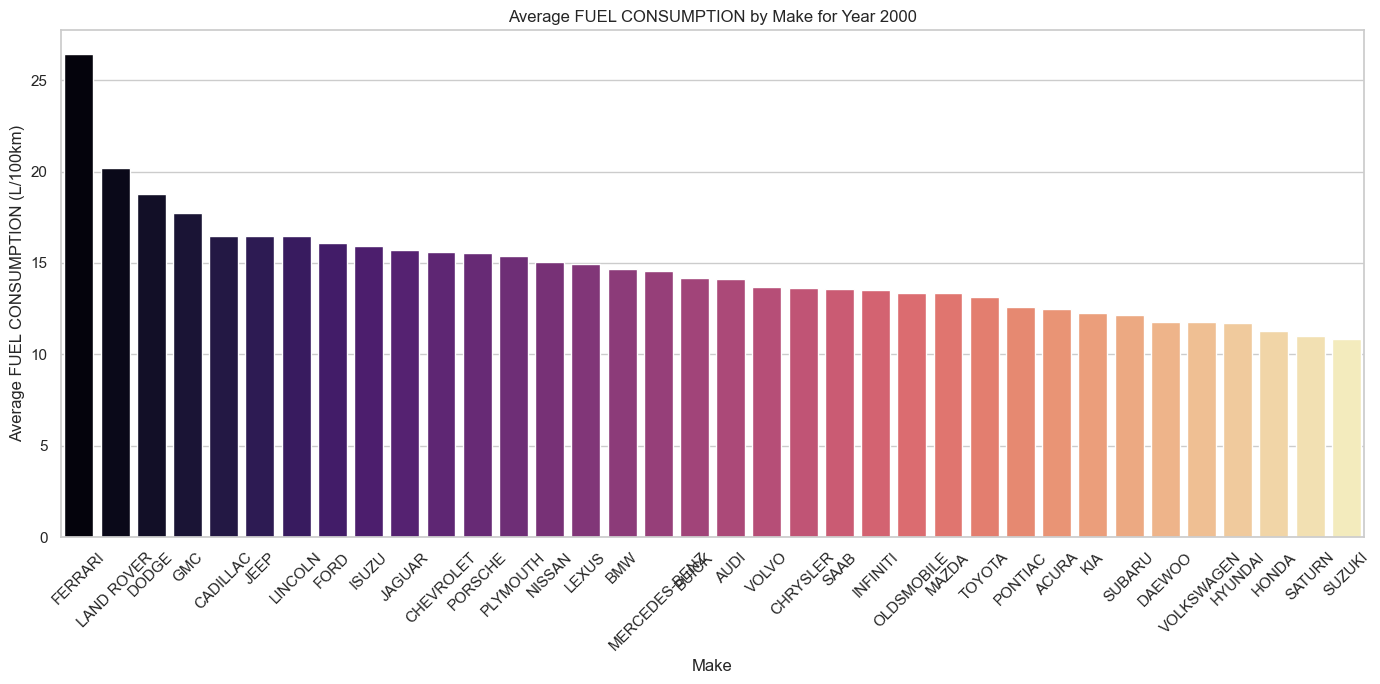

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = "C:\\Users\\mlawal\\Downloads\\archive\\FuelConsumption (1).csv"
data = pd.read_csv(file_path)

# Perform the group by operation, make sure to include the space in 'COEMISSIONS '
grouped_data = data.groupby('MAKE').agg({
    'COEMISSIONS ': 'mean',  # Note the space after 'COEMISSIONS'
    'FUEL CONSUMPTION': 'mean'
}).reset_index()

# Rename the columns to remove any trailing spaces for ease of use
grouped_data.rename(columns={'COEMISSIONS ': 'COEMISSIONS'}, inplace=True)

# Sort the grouped data by emissions and fuel consumption
grouped_data_sorted_emissions = grouped_data.sort_values(by='COEMISSIONS', ascending=False)
grouped_data_sorted_fuel = grouped_data.sort_values(by='FUEL CONSUMPTION', ascending=False)

# Set the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Plotting the average emissions by make
plt.figure(figsize=(14, 7))
sns.barplot(x='MAKE', y='COEMISSIONS', data=grouped_data_sorted_emissions, palette='viridis')
plt.title('Average COEMISSIONS by Make for Year 2000')
plt.ylabel('Average COEMISSIONS (g/km)')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the average fuel consumption by make
plt.figure(figsize=(14, 7))
sns.barplot(x='MAKE', y='FUEL CONSUMPTION', data=grouped_data_sorted_fuel, palette='magma')
plt.title('Average FUEL CONSUMPTION by Make for Year 2000')
plt.ylabel('Average FUEL CONSUMPTION (L/100km)')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


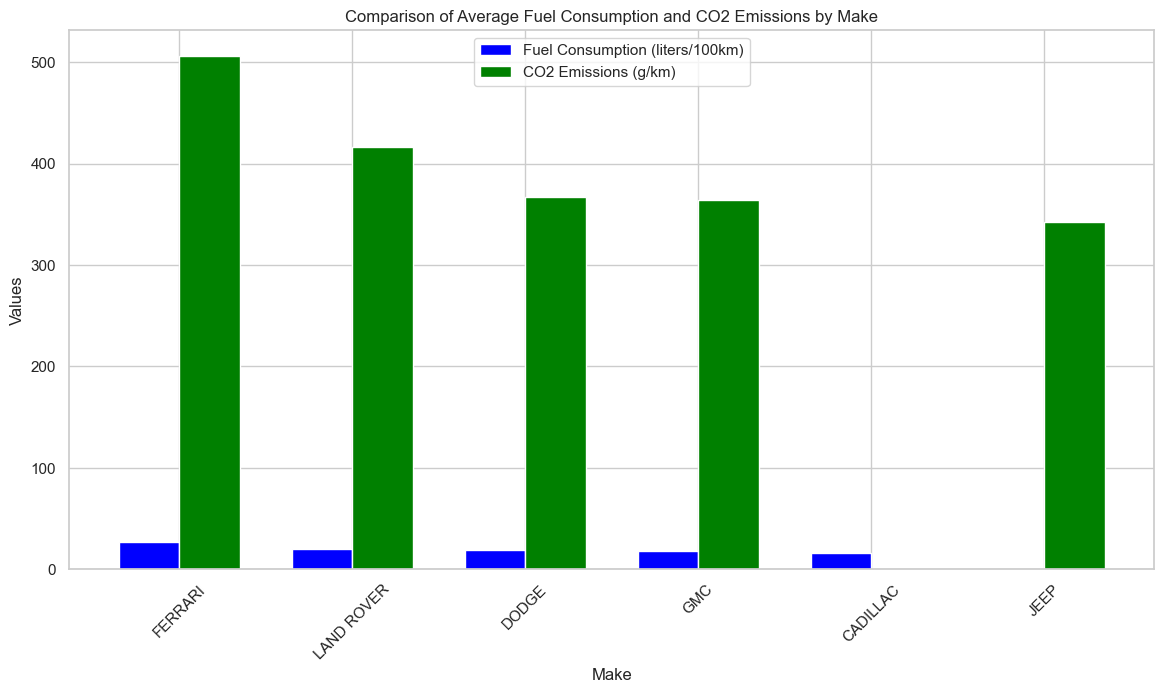

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = r"C:\Users\mlawal\Downloads\archive\FuelConsumption (1).csv"

# Load the data
data = pd.read_csv(file_path)

# Clean up column names that may have leading or trailing spaces
data.columns = data.columns.str.strip()

# Group by 'MAKE' and calculate the mean for 'FUEL CONSUMPTION' and 'COEMISSIONS'
make_averages = data.groupby('MAKE').agg({
    'FUEL CONSUMPTION': 'mean',
    'COEMISSIONS': 'mean'
}).reset_index()

# Sort to find the makes with the highest average fuel consumption and emissions
top_fuel_makes = make_averages.sort_values(by='FUEL CONSUMPTION', ascending=False).head(5)
top_emission_makes = make_averages.sort_values(by='COEMISSIONS', ascending=False).head(5)

# Merge the top makes for fuel consumption and emissions
comparison_data = pd.merge(top_fuel_makes, top_emission_makes, on='MAKE', suffixes=('_fuel', '_emissions'), how='outer')

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
index = range(len(comparison_data))
bar_width = 0.35

# Creating bars for fuel consumption and emissions
ax.bar(index, comparison_data['FUEL CONSUMPTION_fuel'], bar_width, label='Fuel Consumption (liters/100km)', color='blue')
ax.bar([p + bar_width for p in index], comparison_data['COEMISSIONS_emissions'], bar_width, label='CO2 Emissions (g/km)', color='green')

# Adding labels, title, and axes ticks
ax.set_xlabel('Make')
ax.set_ylabel('Values')
ax.set_title('Comparison of Average Fuel Consumption and CO2 Emissions by Make')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(comparison_data['MAKE'], rotation=45)
ax.legend()

# Display the chart
plt.show()


In [33]:
import pandas as pd

# Load the data from the specified CSV file
data = pd.read_csv("C:\\Users\\mlawal\\Downloads\\archive\\FuelConsumption (1).csv")

# Clean up column names that may have leading or trailing spaces
data.columns = data.columns.str.strip()

# Group by 'MAKE' and count unique 'MODEL' entries for each make
model_counts = data.groupby('MAKE')['MODEL'].nunique().reset_index()

# Find the make with the most models
make_with_most_models = model_counts.sort_values(by='MODEL', ascending=False).head(1)

# Display the make with the most models
print(make_with_most_models)


    MAKE  MODEL
10  FORD     29


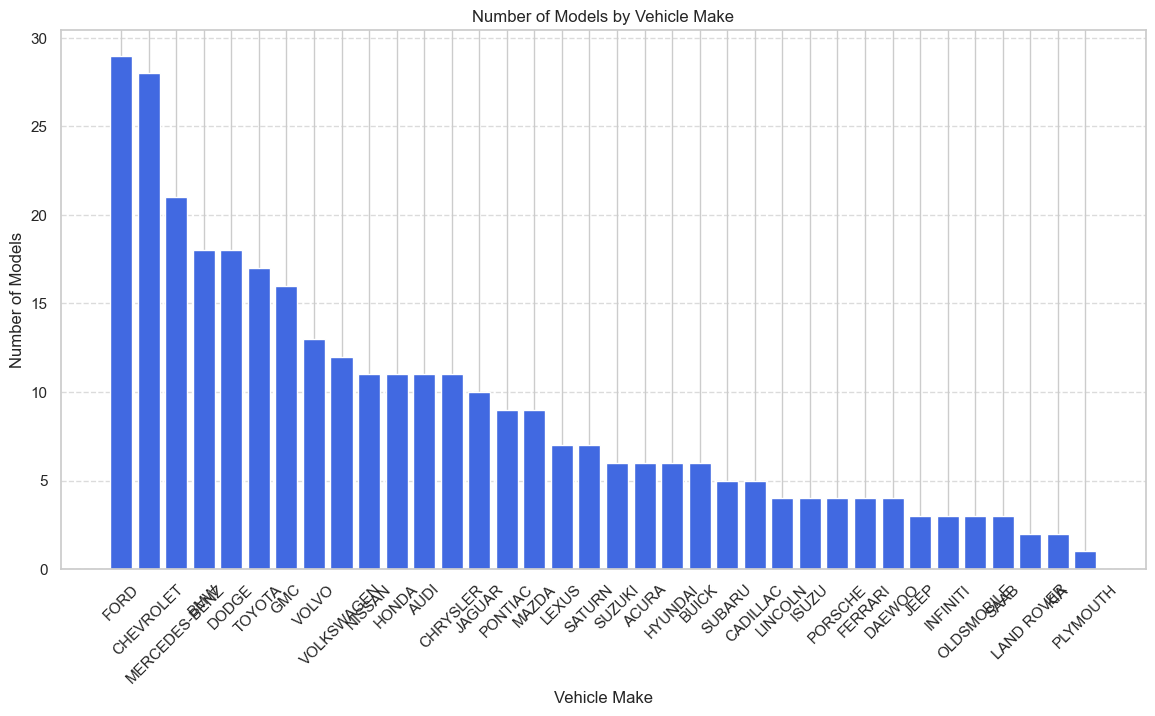

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the specified CSV file
data = pd.read_csv("C:\\Users\\mlawal\\Downloads\\archive\\FuelConsumption (1).csv")

# Clean up column names that may have leading or trailing spaces
data.columns = data.columns.str.strip()

# Group by 'MAKE' and count unique 'MODEL' entries for each make
model_counts = data.groupby('MAKE')['MODEL'].nunique().reset_index()

# Sort the model counts for better visualization
sorted_model_counts = model_counts.sort_values(by='MODEL', ascending=False)

# Create a bar chart
plt.figure(figsize=(14, 7))
plt.bar(sorted_model_counts['MAKE'], sorted_model_counts['MODEL'], color='royalblue')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Models')
plt.title('Number of Models by Vehicle Make')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()
